In [5]:
import numpy as np

### Descenso gradiante con direccion de Newton - Hessiana aproximada via BFGS

#### Implementacion del algoritmo

In [6]:
def Gradiente_BFGS(f, grad, x, alpha=1, max_iter = 500, tolerancia = 0.1, criterio_paro = 'norma_gradiente',
                   optimizar_Hessiana = False):
    
    #Metricas de evaluacion de rendimiento
    
    iters = 0
    x_iter = []
    f_iter = []
    errores = []
    
    converge = False
    
    #Inicializamos B_0 la primera estimacion de la Hessiana: matriz identidad
    
    B = np.identity(len(x))
    
    if (optimizar_Hessiana == True):       #Se puede 'optimizar al estimacion inicial de la Hessiana como en Nocedal p 143'
        
        p = np.matmul(-np.linalg.inv(B),grad(x))

        x_k = x
        x = x + alpha*p

        s = x - x_k
        y = grad(x) - grad(x_k)
        
        B = np.matmul(y.T, s)/np.matmul(y.T, y) * B
    
    
    #notese que hay varios casos de ejecucion del ciclo while debido a los distintos criterios de paro implementados
    
    #Criterios de paro: norma_gradiente, abs_err_x, abs_err_f(x), rel_err_x, rel_err_f(x)
    
    if criterio_paro == 'norma_gradiente':
        
        while(np.linalg.norm(grad(x)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(grad(x)) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'abs_err_x'):
        
        p = np.matmul(-np.linalg.inv(B),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(x-x_k) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'rel_err_x'):
        
        p = np.matmul(-np.linalg.inv(B),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k)/np.linalg.norm(x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
              
        if np.linalg.norm(x-x_k)/np.linalg.norm(x_k) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'abs_err_f(x)'):
        
        p = np.matmul(-np.linalg.inv(B), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
    
        if np.linalg.norm(f(x)-f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'rel_err_f(x)'):
        
        p = np.matmul(-np.linalg.inv(B), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
            
        if np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    else:
        print('El criterio de paro especificado no esta implementado.')
        print('Los criterios implementados son: "norma_gradiente", "abs_err_x", "abs_err_f(x)", "rel_err_x", "rel_err_f(x)"')
        
    
    return x, x_iter, f_iter, errores, iters, converge

#### Prueba con funcion de Rosenbrock 2-dimesional:

In [7]:
def Rosenbrock(x):
    return 100*(x[1][0]-x[0][0]**2)**2 +(1-x[0][0])**2

def grad_Rosenbrock(x):
    
    comp1 = [-400*x[0][0]*(x[1][0]-x[0][0]**2) - 2*(1-x[0][0])]
    
    comp2 = [200*(x[1][0] - x[0][0]**2)]
    
    return np.array([comp1, comp2])



xo = np.array([[-1.2], [1]])

In [20]:
x, x_iter, f_iter, errores, iters, converge = Gradiente_BFGS(Rosenbrock, grad_Rosenbrock,
                                                             xo, alpha = 0.99, tolerancia = 0.000001, optimizar_Hessiana = False)

In [21]:
x, iters, converge

(array([[1.],
        [1.]]),
 39,
 True)

#### Prueba con Wood

In [201]:
def Wood(x):  #Funcion de Wood
    return 100*(x[0][0]**2 - x[1][0]) + (x[0][0] -1)**2 + (x[2][0]-1)**2 + 90*(x[2][0]**2 - x[3][0])

def grad_Wood(x):  #Gradiente de la funcion de Wood
    
    comp1 = [200*x[0][0] + 2*(x[0][0] -1)]
    
    comp2 = [-100]
    
    comp3 = [2*(x[2][0] -1) + 180*x[2][0]]
    
    comp4 = [-90]
    
    return np.array([comp1, comp2, comp3, comp4])





In [206]:
#Parametros de la funcion

f = Wood
grad = grad_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.01
max_iter = 10000
tolerancia = 10**(-5) 
criterio_paro = 'norma_gradiente'
optimizar_Hessiana = False

In [207]:
#Lanzando la busqueda mediante descenso gradiente con direccion de Newton, Hessiano aproximado via BFGS

x, x_iter, f_iter, errores, iters, converge = Gradiente_BFGS(f, grad, 
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro, optimizar_Hessiana)

B [[5. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 5. 0.]
 [0. 0. 0. 5.]]


In [208]:
x, iters, converge

(array([[-1.71289269e+07],
        [-1.03470125e+19],
        [-1.82249749e+07],
        [-9.31231007e+18]]),
 10001,
 False)

Resultados preliminares: Wood no converge el BFGS

#### Prueba con Rosenbrock - 100

In [22]:
def Rosenbrock_100(X):
    
    lista_vals = []
    
    for i in range(0,98):   #99 por el indice de python
        
        val = 100*(X[i+1][0] - X[i]**2)**2 + (1 - X[i][0])**2
        
        lista_vals.append(val)
        
    return np.sum(lista_vals)

In [23]:
def Grad_Rosenbrock_100(X):
    
    componentes = []
    
    for i in range(0,99):    #99 por el indice de python
        
        componente = -400*X[i][0]*(X[i+1][0] - X[i]**2) -2*(1 - X[i][0])
        
        componentes.append(componente)
    
    componentes.append(200*(X[99][0]-X[98]**2))
    
    
    vector = []
    
    for componente in componentes:
        
        vector.append(componente)
        
    return np.array(vector)
    

In [24]:
#Construyendo el punto de inicio X_o

X_o = np.array([[1] for i in range(0,100)], dtype = 'float64')

X_o[0], X_o[98] = np.array([-1.2]), np.array([-1.2])


In [25]:
#Parametros de la funcion

f = Rosenbrock_100
grad = Grad_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 100000
tolerancia = 10**(-4) 
criterio_paro = 'norma_gradiente'
optimizar_Hessiana = False

In [26]:
#Lanzando la busqueda mediante descenso gradiente con direccion de Newton, Hessiano aproximado via BFGS

x, x_iter, f_iter, errores, iters, converge = Gradiente_BFGS(f, grad, 
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro, optimizar_Hessiana)

KeyboardInterrupt: 

In [329]:
x,converge, iters

(array([[-0.99497473],
        [ 1.        ],
        [ 1.        ],
        [ 0.99999999],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.00000001],
        [ 1.00000001],
        [ 1.        ],
        [ 0.99999999],
        [ 0.99999998],
        [ 0.99999998],
        [ 0.99999998],
        [ 0.99999998],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.00000002],
        [ 1.00000003],
        [ 1.00000003],
        [ 1.00000003],
        [ 1.00000003],
        [ 1.00000002],
        [ 1.00000001],
        [ 1.        ],
        [ 0.99999999],
        [ 0.99999998],
        [ 0.99999998],
        [ 0.99999999],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.        ],
        [ 1.00000001],
        [ 1.00000002],
        [ 1.00000001],
        [ 1

## Ejercicio 3 - Suma de Gaussianas

### Construccion y definicion de la funcion

### Definicion de vectores/puntos aleatorios sobre $[0,8]\times[0,8]$

In [35]:
#Inicializando los 8 puntos aleatorios sobre [0,8]x[0,8]

k = 8 #inicializar el No. de vectores

np.random.seed(110594)

vectores_rdm = [np.random.uniform(low=0, high=8, size=(2,1)) for i in range(0,k)]  

### NOTA: Tras correr esta celda es recomendable no cambiarla mientras se estén calculando los minimos de la funcion, 
### De lo contrario cambiarían en cada iteracion del algoritmo...


#### NOTA: 

Tras correr la celda anterior es recomendable no cambiarla o volver a correrla mientras se estén calculando los minimos de la funcion, 
de lo contrario cambiarían en cada iteracion del algoritmo...

### Definicion del parametro $\sigma$

Tambien se recomienda mantener constante este valor a lo largo del experimento, para no cambiar los resultados de una iteracion a otra.

In [104]:
#Definase el parametro sigma 

sigma = 0.85

In [265]:
#Funcion gaussiana

def Sum_Gauss(x, sigma = sigma):
    
    vals = [np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) for vector in vectores_rdm ]
    
    return - np.sum(vals)

### Grafica de la Gaussiana

#### Grafica en 3D

In [106]:
#librerias para graficar

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

La funcion que se define a continuacion se usará exclusivamente para graficar la suma de Gausssianas que se generó.
Es esencialmente la misma funcion con una pequeña modificacion para que sea más facil trabajar con el formato del "meshgrid" que exige matplotlib.

In [107]:
def Sum_Gauss_Graf(x,y,sigma):  #esta funcion solo servirá para graficar 
    
    vals = np.array([np.exp(-1/(2*sigma) * ((x - vector[0])**2 + (y - vector[1])**2)) for vector in vectores_rdm ])
    
    return -sum(vals)

"\nax.set(xlim=(0, 8), ylim=(0, 8), zlim=(-2, 1),\n       xlabel='X', ylabel='Y', zlabel='Z')\n\nax.view_init(elev=15, azim=135)\n"

<Figure size 432x288 with 0 Axes>

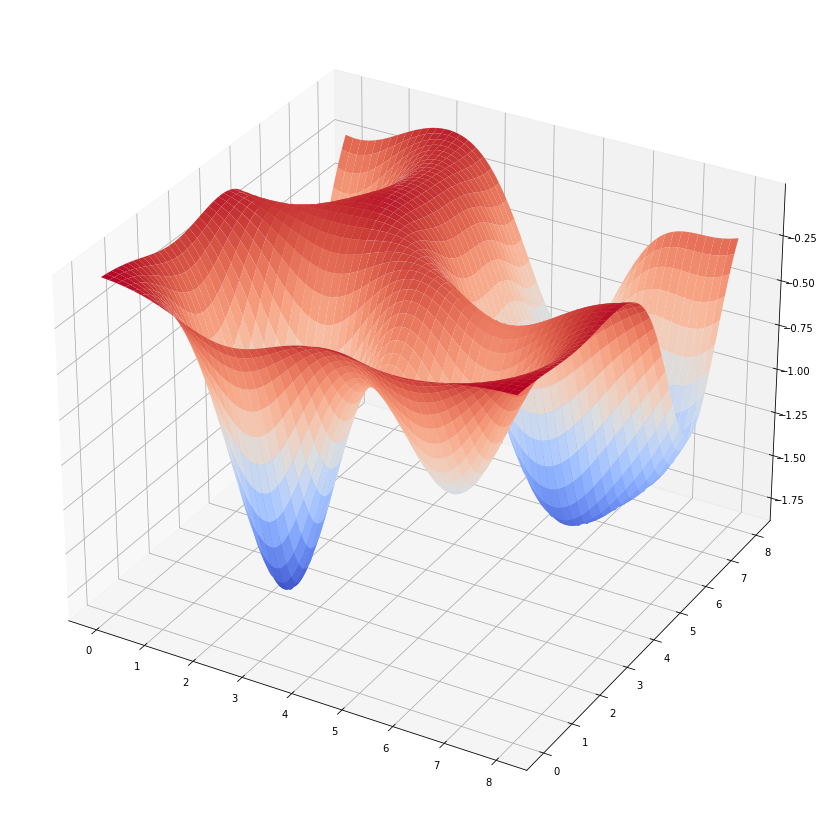

In [108]:
x = np.linspace(0,8, 500)
y = np.linspace(0,8, 500)

X,Y = np.meshgrid(x,y)

Z = Sum_Gauss_Graf(X,Y,sigma)

fig = plt.figure()

fig = plt.figure(figsize =(18, 15))
ax = plt.axes(projection ='3d')

 
# Grafica
ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0)

'''
ax.set(xlim=(0, 8), ylim=(0, 8), zlim=(-2, 1),
       xlabel='X', ylabel='Y', zlabel='Z')

ax.view_init(elev=15, azim=135)
'''




#### Campo gradiente de la suma de Gaussianas


Como vemos en la gráfica a continuación hay 8 minimos locales para esta Gaussiana sobre $[0,8] \times [0,8]$

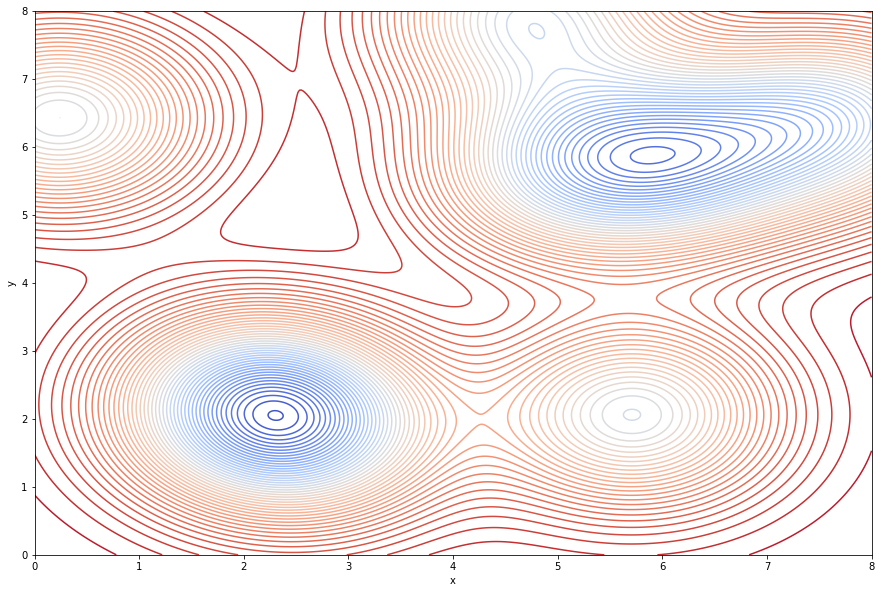

In [109]:
x = np.linspace(0,8, 500)
y = np.linspace(0,8, 500)

X,Y = np.meshgrid(x,y)

Z = Sum_Gauss_Graf(X,Y,sigma)


plt.figure(figsize =(15, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X,Y,Z, 50, cmap = cm.coolwarm)

Ahora, vamos a aplicar el algoritmo del descenso gradiente con direccion de Newton con Hessiano aproximado via BFGS (Gradiente_BFGS) sobre un total de 64 puntos (todos los de la forma $[i,j]$ donde $i,j$ son algun entero en $[0,8]$), para tratar de obtener las posiciones exactas de cada uno de los 8 minimos esperados. 

In [110]:
#Definimos el gradiente de la suma de Gaussianas

def Grad_Sum_Gauss(x, sigma = sigma):
    
    comp_1 = sum([np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) * ( 1/sigma) * (x[0][0] - vector[0][0]) for vector in vectores_rdm])
    comp_2 = sum([np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) * (1/sigma) * (x[1][0] - vector[1][0]) for vector in vectores_rdm])
    
    return np.array([[comp_1], [comp_2]])

In [111]:
#generamos los vectores/puntos de R2

puntos_init = []

for i in range(0,9):
    for j in range (0,9):
        
        puntos_init.append(np.array([[i], [j]]))

In [131]:
#Parametros de la funcion

f = Sum_Gauss
grad = Grad_Sum_Gauss
alpha= 0.01
max_iter = 100000
tolerancia = 0.00001 
criterio_paro = 'abs_err_f(x)'

In [132]:


# Ahora aplicamos el algoritmo de descenso gradiente a cada uno de los puntos iniciales

optimos_encontrados = []
iteraciones_puntos = []
lista_errores = []
No_iters = []
lista_converge = []

for punto in puntos_init:
    
    x, x_iter, f_iter, errores, iters, converge = Gradiente_BFGS(f, grad,
                                                                 punto, alpha, max_iter, 
                                                                 tolerancia, criterio_paro)
    
    optimos_encontrados.append(x)
    iteraciones_puntos.append(x_iter)
    lista_errores.append(errores)
    No_iters.append(iters)
    lista_converge.append(converge)




In [129]:
No_iters

[95,
 265,
 331,
 293,
 211,
 939,
 389,
 404,
 377,
 283,
 429,
 468,
 1221,
 306,
 364,
 414,
 2039,
 321,
 369,
 478,
 406,
 465,
 360,
 256,
 1311,
 327,
 35,
 363,
 166,
 459,
 1238,
 1086,
 296,
 800,
 326,
 1125,
 273,
 623,
 362,
 551,
 493,
 460,
 526,
 358,
 417,
 276,
 627,
 390,
 932,
 55,
 2,
 421,
 317,
 355,
 299,
 417,
 347,
 413,
 339,
 466,
 294,
 387,
 311,
 222,
 368,
 407,
 683,
 351,
 748,
 356,
 434,
 297,
 36,
 200,
 256,
 114,
 265,
 465,
 433,
 431,
 384]

(0.0, 8.0)

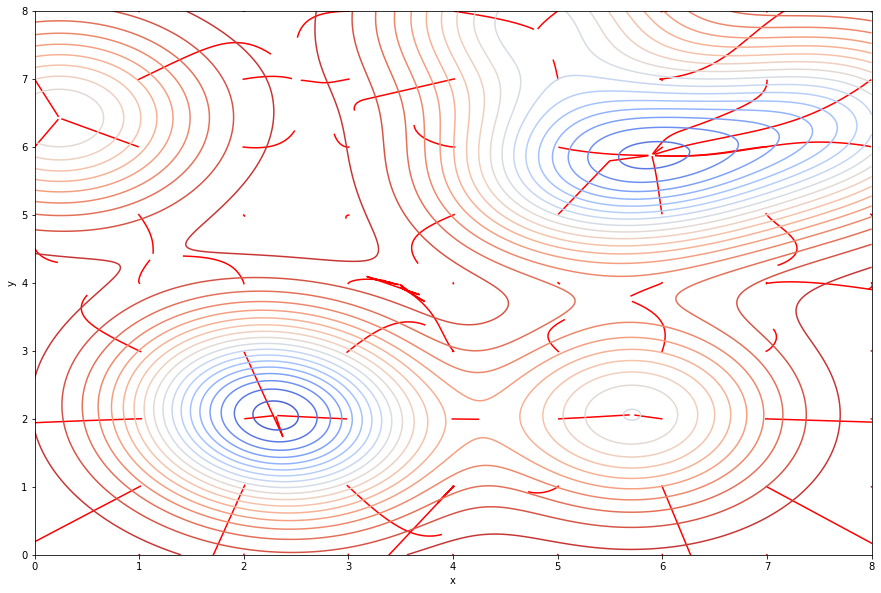

In [133]:
plt.figure(figsize =(15, 10))
plt.xlabel('x')
plt.ylabel('y')

for lista in iteraciones_puntos:
    
    x = [lista[i][0] for i in range(len(lista)) ]
    y = [lista[i][1] for i in range(len(lista)) ]
    
    plt.plot(x,y,  '-r')


plt.contour(X,Y,Z, 20, cmap = cm.coolwarm)

plt.xlim([0, 8])
plt.ylim([0, 8])